In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SEIR(y, t, beta, sigma, gamma):
    S,E,I,R = y
    dSdt = -beta*S*I
    dEdt = beta*S*I - sigma*E
    dIdt = sigma*E - gamma*I
    dRdt = gamma*I
#     print(S,E,I,R)
    return dSdt,dEdt,dIdt,dRdt

In [4]:
def SEIR_demography(y, t, mu,beta, sigma, gamma):
    S,E,I,R = y
    dSdt = -beta*S*I + mu - mu*S
    dEdt = beta*S*I - sigma*E -mu*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I - mu*R
#     print(S,E,I,R)
    return dSdt,dEdt,dIdt,dRdt

(0.99, 0.006225073511179314, 0.0021857341386618133, 0.0015891923501588812)
(0.7, 0.23644671558186114, 0.015513146272979594, 0.048040138145159304)
(0.5, 0.13931325647997528, 0.19870105946263034, 0.16198568405739439)
(0.3, 0.18432916015812773, 0.16627832174125373, 0.3493925181006185)


Text(0, 0.5, 'Fraction recovered')

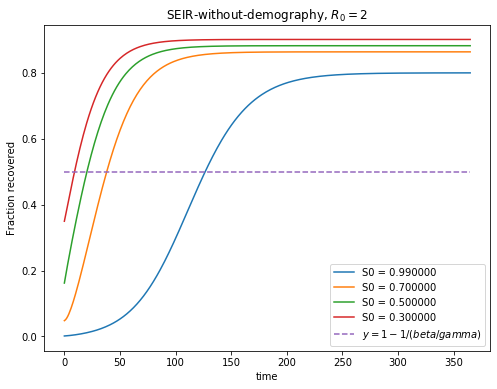

In [114]:
fig = plt.figure(figsize = (8,6))
S0s = [0.99,0.7,0.5,0.3]
beta, sigma, gamma = 0.2,0.1,0.1
t = np.linspace(0,365,365)
for S0 in S0s:
    E0 = np.random.random()*(1-S0)
    I0 = np.random.random()*(1-S0-E0)
    R0 = 1-S0-E0-I0
    y0 = S0,E0,I0,R0
    print(y0)
    ret = odeint(SEIR,y0,t,args=(beta,sigma,gamma))
    S,E,I,R = ret.T
    plt.plot(t,R,'-',label='S0 = %f'%S0)

lstplot = [1-1/(beta/gamma)]*len(t)
plt.plot(t,lstplot,'--',label='$y=1-1/(beta/gamma) $')
plt.legend()
plt.title('SEIR-without-demography, $R_{0} = 2$')
plt.xlabel('time')
plt.ylabel('Fraction recovered')

In [115]:
fig.savefig('SEIR-model-without-demography-different-initial-condition-endemic.jpg')

(0.99, 0.003921905689905864, 0.000503646650458727, 0.005574447659635418)
(0.7, 0.19672210236507315, 0.050701086724755415, 0.05257681091017148)
(0.5, 0.03029249119237276, 0.1592195188623107, 0.31048798994531657)
(0.3, 0.1935746009396739, 0.23349394621048242, 0.2729314528498436)


Text(0, 0.5, 'Fraction recovered')

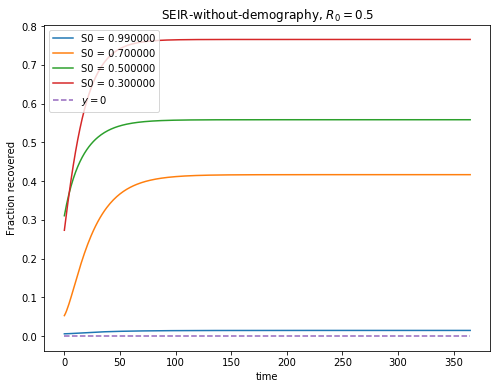

In [116]:
fig = plt.figure(figsize = (8,6))
S0s = [0.99,0.7,0.5,0.3]
beta, sigma, gamma = 0.05,0.1,0.1
t = np.linspace(0,365,365)
for S0 in S0s:
    E0 = np.random.random()*(1-S0)
    I0 = np.random.random()*(1-S0-E0)
    R0 = 1-S0-E0-I0
    y0 = S0,E0,I0,R0
    print(y0)
    ret = odeint(SEIR,y0,t,args=(beta,sigma,gamma))
    S,E,I,R = ret.T
    plt.plot(t,R,'-',label='S0 = %f'%S0)
lstplot = [0]*len(t)
plt.plot(t,lstplot,'--',label='$y=0$')
plt.legend(loc='best')
plt.title('SEIR-without-demography, $R_{0} = 0.5$')
plt.xlabel('time')
plt.ylabel('Fraction recovered')

In [117]:
fig.savefig('SEIR-model-without-demography-different-initial-condition-disease-free.jpg')

(0.99, 0.004010745847245006, 0.004378865212666343, 0.0016103889400886596)
(0.7, 0.24104717071836593, 0.02501247317232309, 0.03394035610931102)
(0.5, 0.48996302721080265, 0.00705697595331968, 0.0029799968358776713)
(0.3, 0.3465128972731696, 0.23381726128965147, 0.1196698414371789)


Text(0, 0.5, 'Fraction recovered')

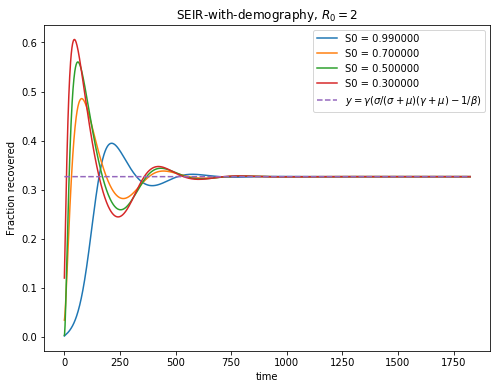

In [118]:
fig = plt.figure(figsize = (8,6))
S0s = [0.99,0.7,0.5,0.3]
beta, sigma, gamma = 0.2,0.1,0.1
t = np.linspace(0,365*5,365*5+1)
mu = 0.01
for S0 in S0s:
    E0 = np.random.random()*(1-S0)
    I0 = np.random.random()*(1-S0-E0)
    R0 = 1-S0-E0-I0
    y0 = S0,E0,I0,R0
    print(y0)
    ret = odeint(SEIR_demography,y0,t,args=(mu,beta,sigma,gamma))
    S,E,I,R = ret.T
    plt.plot(t,R,'-',label='S0 = %f'%S0)
lstplot = [gamma*(sigma/((sigma+mu)*(gamma+mu))-1/beta)]*len(t)
plt.plot(t,lstplot,'--',label= '$y=\gamma(\sigma/(\sigma+\mu)(\gamma+\mu)-1/β)$')
plt.legend()
plt.title('SEIR-with-demography, $R_{0} = 2$')
plt.xlabel('time')
plt.ylabel('Fraction recovered')

In [119]:
fig.savefig('SEIR-model-with-demography-different-initial-condition-endemic.jpg')

(0.99, 0.0007149625728610371, 0.005227095579477808, 0.004057941847661163)
(0.7, 0.106494524426243, 0.06012331775812468, 0.13338215781563234)
(0.5, 0.07167923636975027, 0.3812874076242443, 0.047033356006005445)
(0.3, 0.09120012883102824, 0.3543738839097197, 0.25442598725925203)


Text(0, 0.5, 'Fraction recovered')

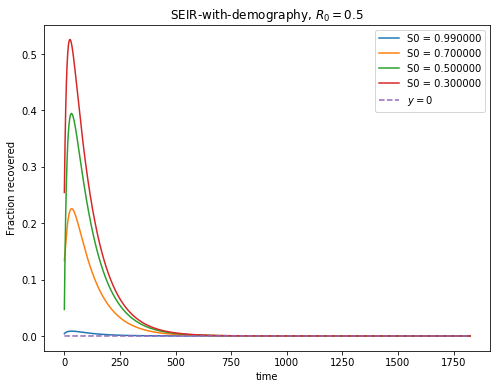

In [120]:
fig = plt.figure(figsize = (8,6))
S0s = [0.99,0.7,0.5,0.3]
beta, sigma, gamma = 0.05,0.1,0.1
t = np.linspace(0,365*5,365*5+1)
mu = 0.01
for S0 in S0s:
    E0 = np.random.random()*(1-S0)
    I0 = np.random.random()*(1-S0-E0)
    R0 = 1-S0-E0-I0
    y0 = S0,E0,I0,R0
    print(y0)
    ret = odeint(SEIR_demography,y0,t,args=(mu,beta,sigma,gamma))
    S,E,I,R = ret.T
    plt.plot(t,R,'-',label='S0 = %f'%S0)
lstplot = [0]*len(t)
plt.plot(t,lstplot,'--',label= '$y=0$')
plt.legend()
plt.title('SEIR-with-demography, $R_{0} = 0.5$')
plt.xlabel('time')
plt.ylabel('Fraction recovered')

In [121]:
fig.savefig('SEIR-model-with-demography-different-initial-condition-disease-free.jpg')

(0.99, 0, 0.010000000000000009, 0)
(0.7, 0, 0.30000000000000004, 0)
(0.5, 0, 0.5, 0)
(0.3, 0, 0.7, 0)
0.99 0.010000000000000009


Text(0.8811, 0.1100000000000001, '(0.99,0.01)')

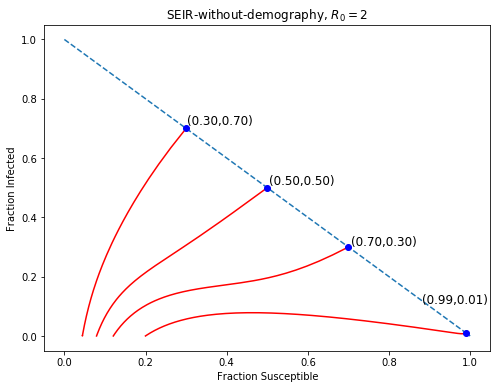

In [122]:
fig = plt.figure(figsize = (8,6))
S0s = [0.99,0.7,0.5,0.3]
beta, sigma, gamma = 0.2,0.1,0.1
t = np.linspace(0,365,365)
points = []
for S0 in S0s:
    E0 = 0
    I0 = 1-S0
    R0 = 0
    y0 = S0,E0,I0,R0
    print(y0)
    points.append((S0,I0))
    ret = odeint(SEIR,y0,t,args=(beta,sigma,gamma))
    S,E,I,R = ret.T
    plt.plot(S,I,'-',color = 'r',label='S0 = %f'%S0)
# lstplot = [1-1/(beta/gamma)]*len(t)
xs= [i for i in np.linspace(0,1,100)]
ys= [1-xs[i] for i in range(len(xs))]
plt.plot(xs,ys,'--')
# plt.legend()
plt.title('SEIR-without-demography, $R_{0} = 2$')
plt.xlabel('Fraction Susceptible')
plt.ylabel('Fraction Infected')

for i in range(1,len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.02) , '(%1.2f,%1.2f)'%(x,y), fontsize=12)
x = points[0][0]
y = points[0][1]
print(x,y)
plt.plot(x, y, 'bo')
plt.text(x * (0.89), y * (11) , '(%1.2f,%1.2f)'%(x,y), fontsize=12)

In [123]:
fig.savefig('SEIR-without-demography-phase-diagram-endemic.jpg')

(0.99, 0, 0.010000000000000009, 0)
(0.7, 0, 0.30000000000000004, 0)
(0.5, 0, 0.5, 0)
(0.3, 0, 0.7, 0)
0.99 0.010000000000000009


Text(0.8811, 0.1100000000000001, '(0.99,0.01)')

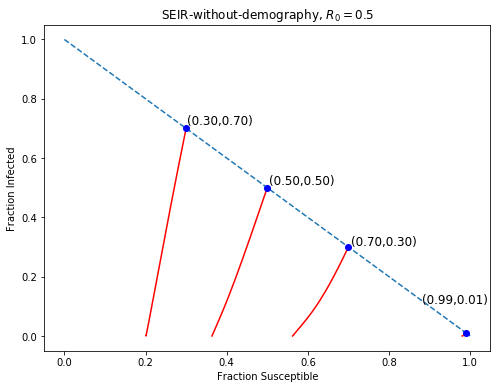

In [124]:
fig = plt.figure(figsize = (8,6))
S0s = [0.99,0.7,0.5,0.3]
beta, sigma, gamma = 0.05,0.1,0.1
t = np.linspace(0,365,365)
points = []
for S0 in S0s:
    E0 = 0
    I0 = 1-S0
    R0 = 0
    y0 = S0,E0,I0,R0
    print(y0)
    points.append((S0,I0))
    ret = odeint(SEIR,y0,t,args=(beta,sigma,gamma))
    S,E,I,R = ret.T
    plt.plot(S,I,'-',color = 'r',label='S0 = %f'%S0)
# lstplot = [1-1/(beta/gamma)]*len(t)
xs= [i for i in np.linspace(0,1,100)]
ys= [1-xs[i] for i in range(len(xs))]
plt.plot(xs,ys,'--')
# plt.legend()
plt.title('SEIR-without-demography, $R_{0} = 0.5$')
plt.xlabel('Fraction Susceptible')
plt.ylabel('Fraction Infected')

for i in range(1,len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.02) , '(%1.2f,%1.2f)'%(x,y), fontsize=12)
x = points[0][0]
y = points[0][1]
print(x,y)
plt.plot(x, y, 'bo')
plt.text(x * (0.89), y * (11) , '(%1.2f,%1.2f)'%(x,y), fontsize=12)

In [125]:
fig.savefig('SEIR-without-demography-phase-diagram-disease-free.jpg')

(0.99, 0, 0.010000000000000009, 0)
(0.7, 0, 0.30000000000000004, 0)
(0.5, 0, 0.5, 0)
(0.3, 0, 0.7, 0)
0.99 0.010000000000000009


Text(0.8811, 0.1100000000000001, '(0.99,0.01)')

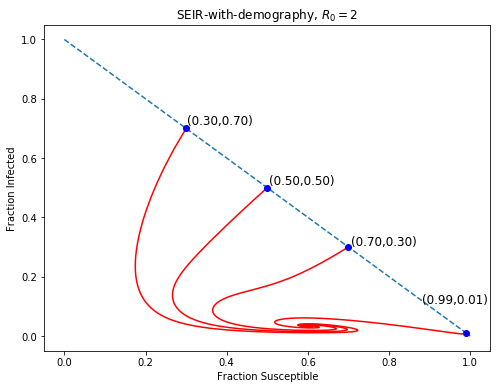

In [126]:
fig = plt.figure(figsize = (8,6))
S0s = [0.99,0.7,0.5,0.3]
beta, sigma, gamma = 0.2,0.1,0.1
t = np.linspace(0,365*5,365*5+1)
mu = 0.01
points = []
for S0 in S0s:
    E0 = 0
    I0 = 1-S0
    R0 = 0
    y0 = S0,E0,I0,R0
    print(y0)
    points.append((S0,I0))
    ret = odeint(SEIR_demography,y0,t,args=(mu,beta,sigma,gamma))
    S,E,I,R = ret.T
    plt.plot(S,I,'-',color='r',label='S0 = %f'%S0)
# lstplot = [1-1/(beta/gamma)]*len(t)
xs= [i for i in np.linspace(0,1,100)]
ys= [1-xs[i] for i in range(len(xs))]
plt.plot(xs,ys,'--')
# plt.legend()
plt.title('SEIR-with-demography, $R_{0} = 2$')
plt.xlabel('Fraction Susceptible')
plt.ylabel('Fraction Infected')

for i in range(1,len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.02) , '(%1.2f,%1.2f)'%(x,y), fontsize=12)
x = points[0][0]
y = points[0][1]
print(x,y)
plt.plot(x, y, 'bo')
plt.text(x * (0.89), y * (11) , '(%1.2f,%1.2f)'%(x,y), fontsize=12)

In [127]:
fig.savefig('SEIR-with-demography-phase-diagram-endemic.jpg')

(0.99, 0, 0.010000000000000009, 0)
(0.7, 0, 0.30000000000000004, 0)
(0.5, 0, 0.5, 0)
(0.3, 0, 0.7, 0)
0.99 0.010000000000000009


Text(0.8811, 0.1100000000000001, '(0.99,0.01)')

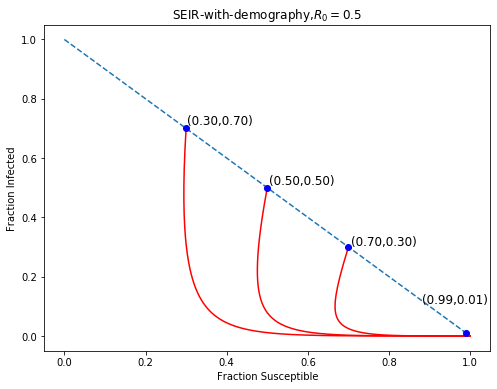

In [128]:
fig = plt.figure(figsize = (8,6))
S0s = [0.99,0.7,0.5,0.3]
beta, sigma, gamma = 0.05,0.1,0.1
t = np.linspace(0,365*5,365*5+1)
mu = 0.01
points = []
for S0 in S0s:
    E0 = 0
    I0 = 1-S0
    R0 = 0
    y0 = S0,E0,I0,R0
    points.append((S0,I0))
    print(y0)
    ret = odeint(SEIR_demography,y0,t,args=(mu,beta,sigma,gamma))
    S,E,I,R = ret.T
    plt.plot(S,I,'-',color='r',label='S0 = %f'%S0)
# lstplot = [1-1/(beta/gamma)]*len(t)
xs= [i for i in np.linspace(0,1,100)]
ys= [1-xs[i] for i in range(len(xs))]
plt.plot(xs,ys,'--')
# plt.legend()
plt.title('SEIR-with-demography,$R_{0} = 0.5$')
plt.xlabel('Fraction Susceptible')
plt.ylabel('Fraction Infected')

for i in range(1,len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.02) , '(%1.2f,%1.2f)'%(x,y), fontsize=12)
x = points[0][0]
y = points[0][1]
print(x,y)
plt.plot(x, y, 'bo')
plt.text(x * (0.89), y * (11) , '(%1.2f,%1.2f)'%(x,y), fontsize=12)

In [129]:
fig.savefig('SEIR-with-demography-phase-diagram-disease-free.jpg')